<a href="https://colab.research.google.com/github/whkaikai/CV-ML-Al/blob/main/%E7%9B%B4%E6%96%B9%E5%9B%BE%E5%9D%87%E8%A1%A1%E5%8C%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[INFO] matplotlib版本为：3.2.2


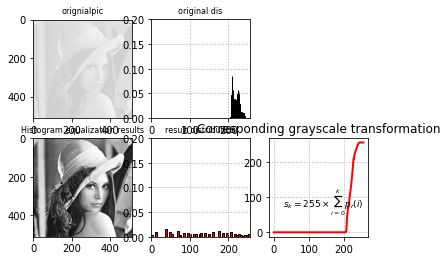

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# 中文支持函数
def set_chinese():
    import matplotlib
    print("[INFO] matplotlib版本为：%s" % matplotlib.__version__)
    matplotlib.rcParams['font.sans-serif'] = ['FangSong']
    matplotlib.rcParams['axes.unicode_minus'] = False

# 获取图像的概率密度
def get_pdf(in_img):
    total = in_img.shape[0] * in_img.shape[1] #计算图片总像素数
    return [ np.sum(in_img == i)/total for i in range(256) ] #求概率密度

# 直方图均衡化（核心代码）
def hist_equal(in_img):

    # 1.求输入图像的概率密度
    Pr = get_pdf(in_img)

    # 2.构造输出图像（初始化成输入）
    out_img = np.copy(in_img)

    # 3.执行“直方图均衡化”（执行累积分布函数变换）
    y_points = [] # 存储点集，用于画图
    SUMk = 0.  # 累加值存储变量
    for i in range(256):
        SUMk = SUMk + Pr[i]
        out_img[(in_img == i)] = SUMk*255. #灰度值逆归一化
        y_points.append(SUMk*255.) #构造绘制函数图像的点集（非核心代码，可忽略）

    return out_img, y_points




if __name__ == '__main__':

    set_chinese()

    # 读入原图
    gray_img = np.asarray(Image.open('/content/bright_lena.png').convert('L'))

    # 对原图执行“直方图均衡化”
    out_img, y_points = hist_equal(gray_img)

    # 创建1个显示主体，并分成6个显示区域
    fig = plt.figure()
    ax1, ax2 = fig.add_subplot(231), fig.add_subplot(232)
    ax3, ax4 = fig.add_subplot(234), fig.add_subplot(235)
    ax5 = fig.add_subplot(236)

    # 窗口显示：原图，原图灰度分布，结果图像，结果图像灰度分布
    ax1.set_title('orignialpic', fontsize=8)
    ax1.imshow(gray_img, cmap='gray', vmin=0, vmax=255)

    ax2.grid(True, linestyle=':', linewidth=1)
    ax2.set_title('original dis', fontsize=8)
    ax2.set_xlim(0, 255)  # 设置x轴分布范围
    ax2.set_ylim(0, 0.2)  # 设置y轴分布范围
    ax2.hist(gray_img.flatten(),bins=50,density=True,color='r',edgecolor='k')

    ax3.set_title('Histogram equalization results', fontsize=8)
    ax3.imshow(out_img, cmap='gray', vmin=0, vmax=255)

    ax4.grid(True, linestyle=':', linewidth=1)
    ax4.set_title('result distribution', fontsize=8)
    ax4.set_xlim(0, 255)  # 设置x轴分布范围
    ax4.set_ylim(0, 0.2)  # 设置y轴分布范围
    ax4.hist(out_img.flatten(),bins=50,density=True,color='r',edgecolor='k')

    # 窗口显示：绘制对应的灰度变换函数
    ax5.set_title("Corresponding grayscale transformation", fontsize=12)
    ax5.grid(True, linestyle=':', linewidth=1)
    ax5.plot(np.arange(0, 256, 1), y_points, color='r',lw=2)
    ax5.text(25, 70, r'$s_k=255\times\sum_{i=0}^{k}p_r(i)$', fontsize=9)
    
    plt.show()